In [6]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [8]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
image_size = 224
input_shape = (image_size, image_size, 3)
epochs = 5
batch_size = 16
pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

In [11]:
for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

In [12]:
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

In [13]:
x = GlobalMaxPooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)

In [16]:
model = Model(pre_trained_model.input, x)

In [18]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 512)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,6

 Total params: 14,977,857 (57.14 MB)

 Trainable params: 7,342,593 (28.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
train_path = '/content/drive/My Drive/Dataset/train'
test_path = '/content/drive/My Drive/Dataset/test'
val_path = '/content/drive/My Drive/Dataset/val'

In [25]:
import tensorflow as tf
train_batches= ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet.preprocess_input).flow_from_directory( directory=train_path, target_size=(224,224), batch_size= 10)
test_batches= ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet.preprocess_input).flow_from_directory( directory=test_path, target_size=(224,224), batch_size= 10, shuffle = False )
val_batches= ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet.preprocess_input).flow_from_directory( directory=val_path, target_size=(224,224), batch_size= 10)

Found 1200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 399 images belonging to 2 classes.


In [26]:
imgs,labels= next(train_batches)

In [27]:
image_size = (224, 224)
batch_size = 10

train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)

train_batches = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_batches = test_val_datagen.flow_from_directory(
    directory=val_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_batches = test_val_datagen.flow_from_directory(
    directory=test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

imgs, labels = next(train_batches)

Found 1200 images belonging to 2 classes.
Found 399 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


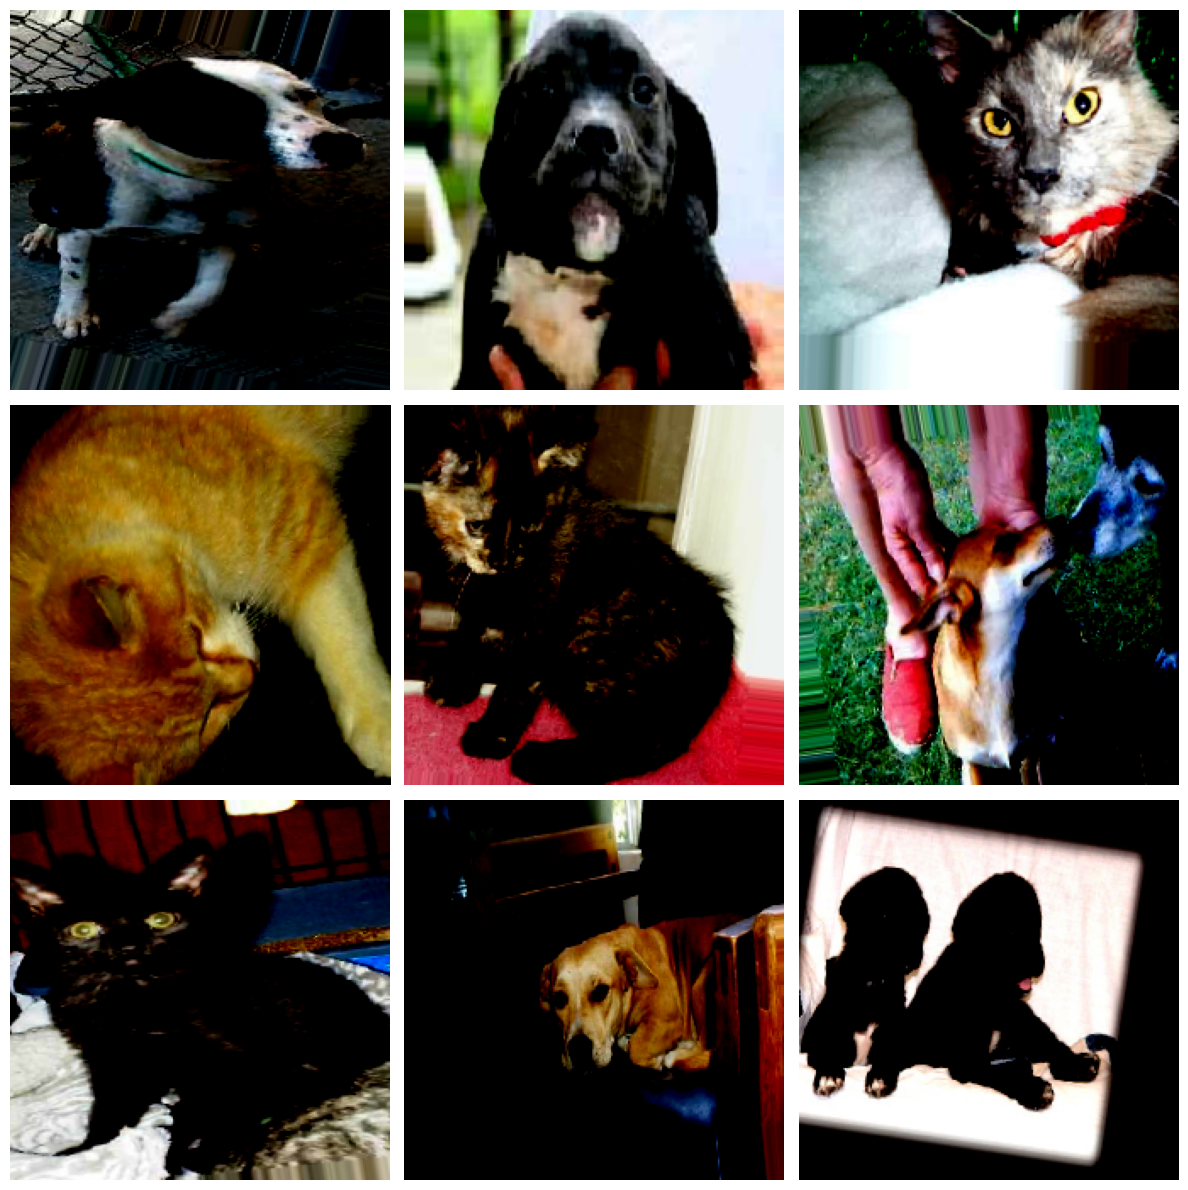

In [28]:
import matplotlib.pyplot as plt
import numpy as np

train_generator = train_batches

train_images, train_labels = next(train_generator)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [29]:
history = model.fit(
    train_batches,
    epochs=epochs,
    validation_data=val_batches,
    validation_steps=len(val_batches),
    steps_per_epoch=len(train_batches)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 1260s 10s/step - accuracy: 0.6383 - loss: 0.6841 - val_accuracy: 0.9223 - val_loss: 0.2394
Epoch 2/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 1205s 10s/step - accuracy: 0.8512 - loss: 0.3056 - val_accuracy: 0.9348 - val_loss: 0.1567
Epoch 3/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 1173s 10s/step - accuracy: 0.9275 - loss: 0.1977 - val_accuracy: 0.9398 - val_loss: 0.1380
Epoch 4/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 1167s 10s/step - accuracy: 0.9504 - loss: 0.1325 - val_accuracy: 0.9524 - val_loss: 0.1123
Epoch 5/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 1165s 10s/step - accuracy: 0.9411 - loss: 0.1566 - val_accuracy: 0.9524 - val_loss: 0.1017


In [30]:
model.save('/content/drive/MyDrive/model.h5')

In [31]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/model.h5')

In [33]:
loss, accuracy = model.evaluate(val_batches)
print(f"Test: accuracy = {accuracy:.6f}  ;  loss = {loss:.6f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 257s 6s/step - accuracy: 0.9443 - loss: 0.1068
Test: accuracy = 0.952381  ;  loss = 0.101669


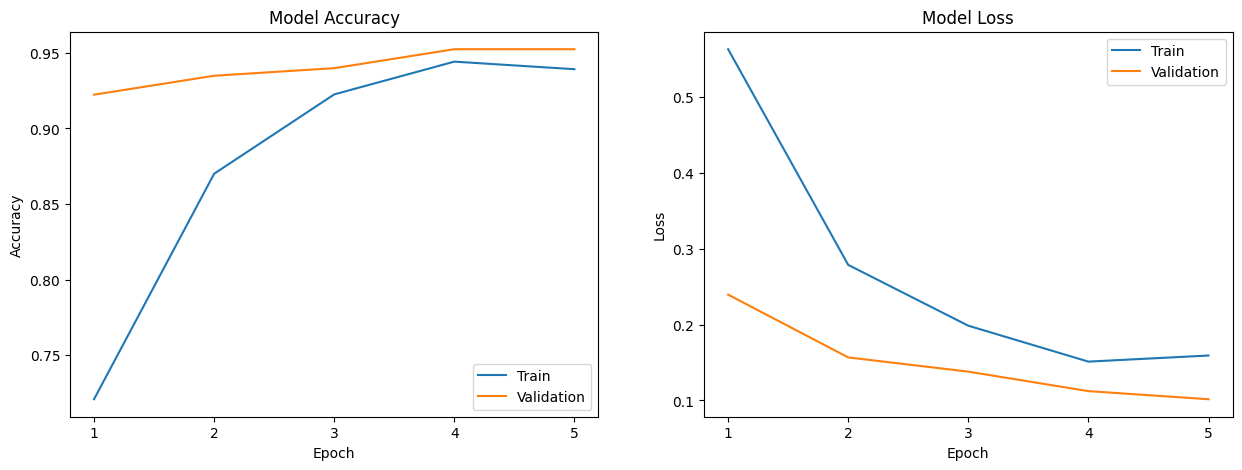

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Accuracy Plot
    axs[0].plot(range(1, len(model_history.history[acc]) + 1), model_history.history[acc])
    axs[0].plot(range(1, len(model_history.history[val_acc]) + 1), model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history[acc]) + 1, max(1, len(model_history.history[acc]) // 10)))
    axs[0].legend(['Train', 'Validation'], loc='best')

    # Loss Plot
    axs[1].plot(range(1, len(model_history.history['loss']) + 1), model_history.history['loss'])
    axs[1].plot(range(1, len(model_history.history['val_loss']) + 1), model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history['loss']) + 1, max(1, len(model_history.history['loss']) // 10)))
    axs[1].legend(['Train', 'Validation'], loc='best')

    plt.show()

plot_model_history(history)

In [35]:
import numpy as np

Y_val = val_batches.classes

y_pred_prob = model.predict(val_batches)

y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("True Labels:", Y_val[:10])
print("Predicted Labels:", y_pred[:10])


40/40 ━━━━━━━━━━━━━━━━━━━━ 247s 6s/step
True Labels: [0 0 0 0 0 0 0 0 0 0]
Predicted Labels: [0 0 0 0 0 0 0 0 0 0]


In [36]:
threshold = 0.5

y_final = (y_pred_prob > threshold).astype(int).flatten()

print("Predicted Probabilities:", y_pred_prob[:10].flatten())  # First 10 probabilities
print("Final Binary Predictions:", y_final[:10])  # First 10 binary class labels

Predicted Probabilities: [1.9796069e-01 6.8718888e-05 3.6875498e-03 2.9154820e-03 5.4649673e-03
 3.5648030e-05 2.1123784e-04 3.2382315e-01 1.8152256e-03 1.8713711e-01]
Final Binary Predictions: [0 0 0 0 0 0 0 0 0 0]


In [37]:
y_final.size

399

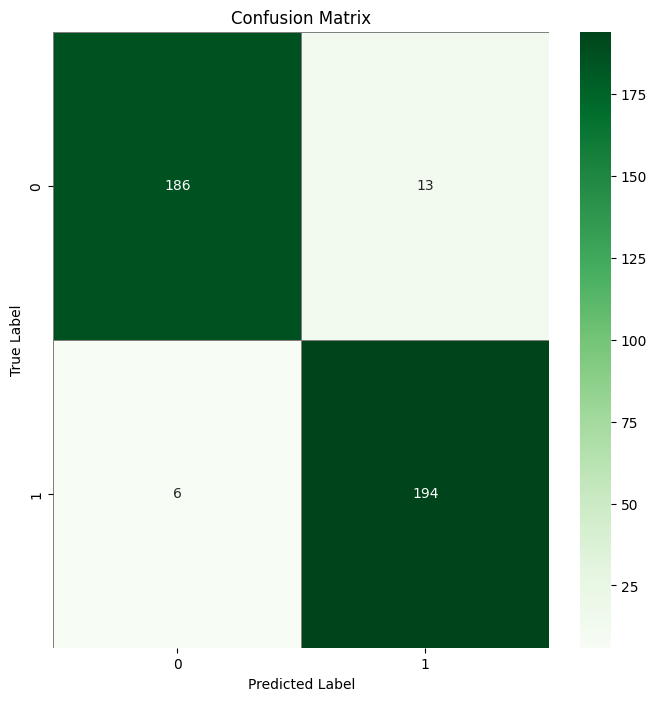

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(Y_val, y_final)

plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Greens", linewidths=0.5, linecolor="gray")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [39]:
from sklearn.metrics import classification_report
report = classification_report(Y_val, y_final, target_names=['0','1'])
print(report)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       199
           1       0.94      0.97      0.95       200

    accuracy                           0.95       399
   macro avg       0.95      0.95      0.95       399
weighted avg       0.95      0.95      0.95       399



In [40]:
from sklearn.metrics import classification_report
report = classification_report(Y_val, y_final, target_names=['Cat', 'Dog'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         Cat       0.97      0.93      0.95       199
         Dog       0.94      0.97      0.95       200

    accuracy                           0.95       399
   macro avg       0.95      0.95      0.95       399
weighted avg       0.95      0.95      0.95       399



In [41]:
import os
import pandas as pd

test_filenames = os.listdir(test_path)

test_df = pd.DataFrame({'filename': test_filenames})

nb_samples = len(test_df)

print(test_df.head())
print(f"Total test samples: {nb_samples}")

  filename
0      cat
1      dog
Total test samples: 2


In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_gen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_gen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_path,
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)

print(f"Test Generator: {len(test_generator)} batches of {batch_size} images")

Found 0 validated image filenames.
Test Generator: 0 batches of 10 images


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [45]:
test_filenames = os.listdir(test_path)
test_filenames = [f for f in test_filenames if f.lower().endswith(('png', 'jpg', 'jpeg'))]
test_df = pd.DataFrame({'filename': test_filenames})

In [46]:
nb_samples = len(test_df)
print(test_df.head())
print(f"Total test samples: {nb_samples}")


Empty DataFrame
Columns: [filename]
Index: []
Total test samples: 0


In [47]:
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)


In [48]:
test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=None,  # No labels needed for testing
    shuffle=False
)

print(f"Test Generator: {len(test_generator)} batches of {batch_size} images")

Found 200 images belonging to 2 classes.
Test Generator: 20 batches of 10 images


In [49]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples / batch_size))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 136s 7s/step
